<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/PyTorch_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='data/', train=False, transform=transforms.ToTensor(), download=True)

# Split the dataset into train and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Normalize the pixel values
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
normalize = transforms.Normalize(mean=mean, std=std)

# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Apply normalization to the train and test datasets
train_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])
test_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# CNN

In [ ]:
# WORKS

# class VGG16(nn.Module):
#     def __init__(self):
#         super(VGG16, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(64 * 8 * 8, 4096)
#         self.fc2 = nn.Linear(4096, 4096)
#         self.fc3 = nn.Linear(4096, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 64 * 8 * 8)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# VGG16

In [ ]:
# First Epoch 9% or 10%

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class VGG16(nn.Module):
#     def __init__(self):
#         super(VGG16, self).__init__()
#         self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
#         self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
#         self.pool1 = nn.MaxPool2d(2, 2)
#         self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
#         self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
#         self.pool2 = nn.MaxPool2d(2, 2)
#         self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
#         self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
#         self.conv7 = nn.Conv2d(256, 256, 3, padding=1)
#         self.pool3 = nn.MaxPool2d(2, 2)
#         self.conv8 = nn.Conv2d(256, 512, 3, padding=1)
#         self.conv9 = nn.Conv2d(512, 512, 3, padding=1)
#         self.conv10 = nn.Conv2d(512, 512, 3, padding=1)
#         self.pool4 = nn.MaxPool2d(2, 2)
#         self.conv11 = nn.Conv2d(512, 512, 3, padding=1)
#         self.conv12 = nn.Conv2d(512, 512, 3, padding=1)
#         self.conv13 = nn.Conv2d(512, 512, 3, padding=1)
#         self.pool5 = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(512, 4096)
#         self.fc2 = nn.Linear(4096, 4096)
#         self.fc3 = nn.Linear(4096, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = F.relu(self.conv2(x))
#         x = self.pool1(x)
#         x = F.relu(self.conv3(x))
#         x = F.relu(self.conv4(x))
#         x = self.pool2(x)
#         x = F.relu(self.conv5(x))
#         x = F.relu(self.conv6(x))
#         x = F.relu(self.conv7(x))
#         x = self.pool3(x)
#         x = F.relu(self.conv8(x))
#         x = F.relu(self.conv9(x))
#         x = F.relu(self.conv10(x))
#         x = self.pool4(x)
#         x = F.relu(self.conv11(x))
#         x = F.relu(self.conv12(x))
#         x = F.relu(self.conv13(x))
#         x = self.pool5(x)
#         x = x.view(-1, 512)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# Improved VGG16

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, num_classes)
        

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.pool3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [ ]:
model = VGG16()

In [ ]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# # Train the model
# for epoch in range(5):
#   running_loss = 0.0
#   for i, data in enumerate(train_loader, 0):
#     inputs, labels = data
#     optimizer.zero_grad()

#     outputs = model(inputs)
#     loss = criterion(outputs, labels)
#     loss.backward()
#     optimizer.step()

#     running_loss += loss.item()
#   if (epoch + 1) % 10 == 0:
#     print("Epoch: %d, Loss: %.4f" % (epoch + 1, running_loss / 2000))

In [ ]:
# WORKS

# Train the model
for epoch in range(20):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = 100 * correct / total

    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(test_loader.dataset)
    val_accuracy = 100 * correct / total

    print('Epoch: {}/20'.format(epoch+1))
    print('Training Loss: {:.4f}, Accuracy: {:.2f}%'.format(train_loss, train_accuracy))
    print('Validation Loss: {:.4f}, Accuracy: {:.2f}%'.format(val_loss, val_accuracy))

Epoch: 1/20
Training Loss: 0.0875, Accuracy: 48.42%
Validation Loss: 0.0627, Accuracy: 64.83%
Epoch: 2/20
Training Loss: 0.0570, Accuracy: 68.36%
Validation Loss: 0.0513, Accuracy: 71.64%
Epoch: 3/20
Training Loss: 0.0448, Accuracy: 75.35%
Validation Loss: 0.0439, Accuracy: 76.28%
Epoch: 4/20
Training Loss: 0.0378, Accuracy: 79.63%
Validation Loss: 0.0343, Accuracy: 81.45%


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import torch

# Save the model
torch.save(model, '/content/gdrive/MyDrive/Deep Learning/model.pt')

# Load the model
model = VGG16()
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Deep Learning/model.pt'))

In [ ]:
import matplotlib.pyplot as plt

def predict(model, inputs):
    model.eval()
    with torch.no_grad():
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
    return predicted

In [ ]:
# Load your trained model
model = VGG16()
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Deep Learning/model.pt'))

# Load an image and convert it to a tensor
from PIL import Image
import torchvision.transforms as transforms
img = Image.open("/content/gdrive/MyDrive/Deep Learning/image.jpg")
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
img_tensor = transform(img).unsqueeze(0)

# Make a prediction
predicted = predict(model, img_tensor)
print("Prediction:", predicted)

# Plot the image
plt.imshow(img)
plt.show()

# Results

## Single Dropout Layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.pool3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


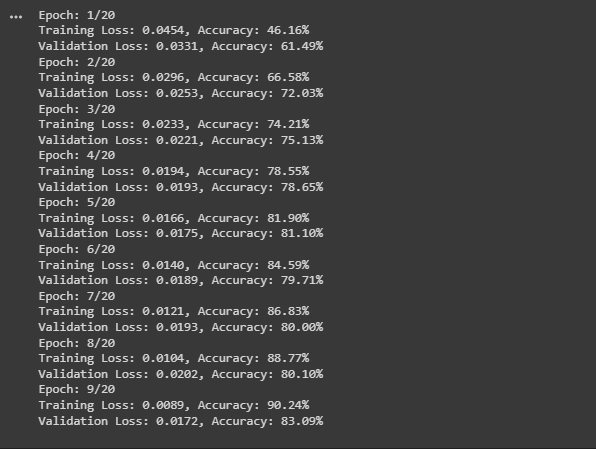

## Double Dropout Layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, num_classes)
        

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.pool3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

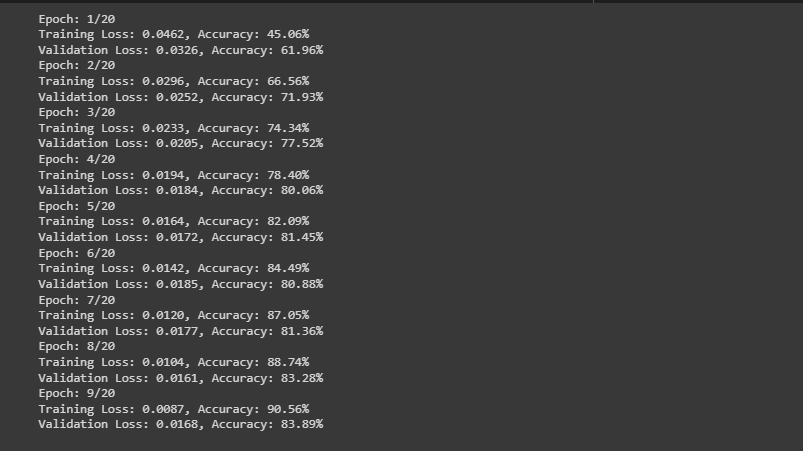

## Increasing Batch Size (64)

In [ ]:
# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='data/', train=False, transform=transforms.ToTensor(), download=True)

# Split the dataset into train and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Normalize the pixel values
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
normalize = transforms.Normalize(mean=mean, std=std)

# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Apply normalization to the train and test datasets
train_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])
test_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn7 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, num_classes)
        

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.relu(self.bn7(self.conv7(x)))
        x = self.pool3(x)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


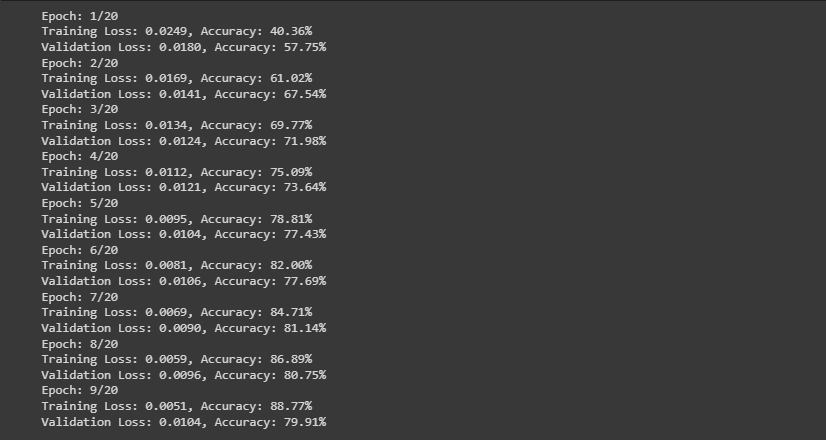

## Decreasing Batch Size (16)

In [ ]:
# Load the CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.CIFAR10(root='data/', train=False, transform=transforms.ToTensor(), download=True)

# Split the dataset into train and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Normalize the pixel values
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
normalize = transforms.Normalize(mean=mean, std=std)

# transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Apply normalization to the train and test datasets
train_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])
test_dataset.transform = transforms.Compose([transforms.ToTensor(), normalize])

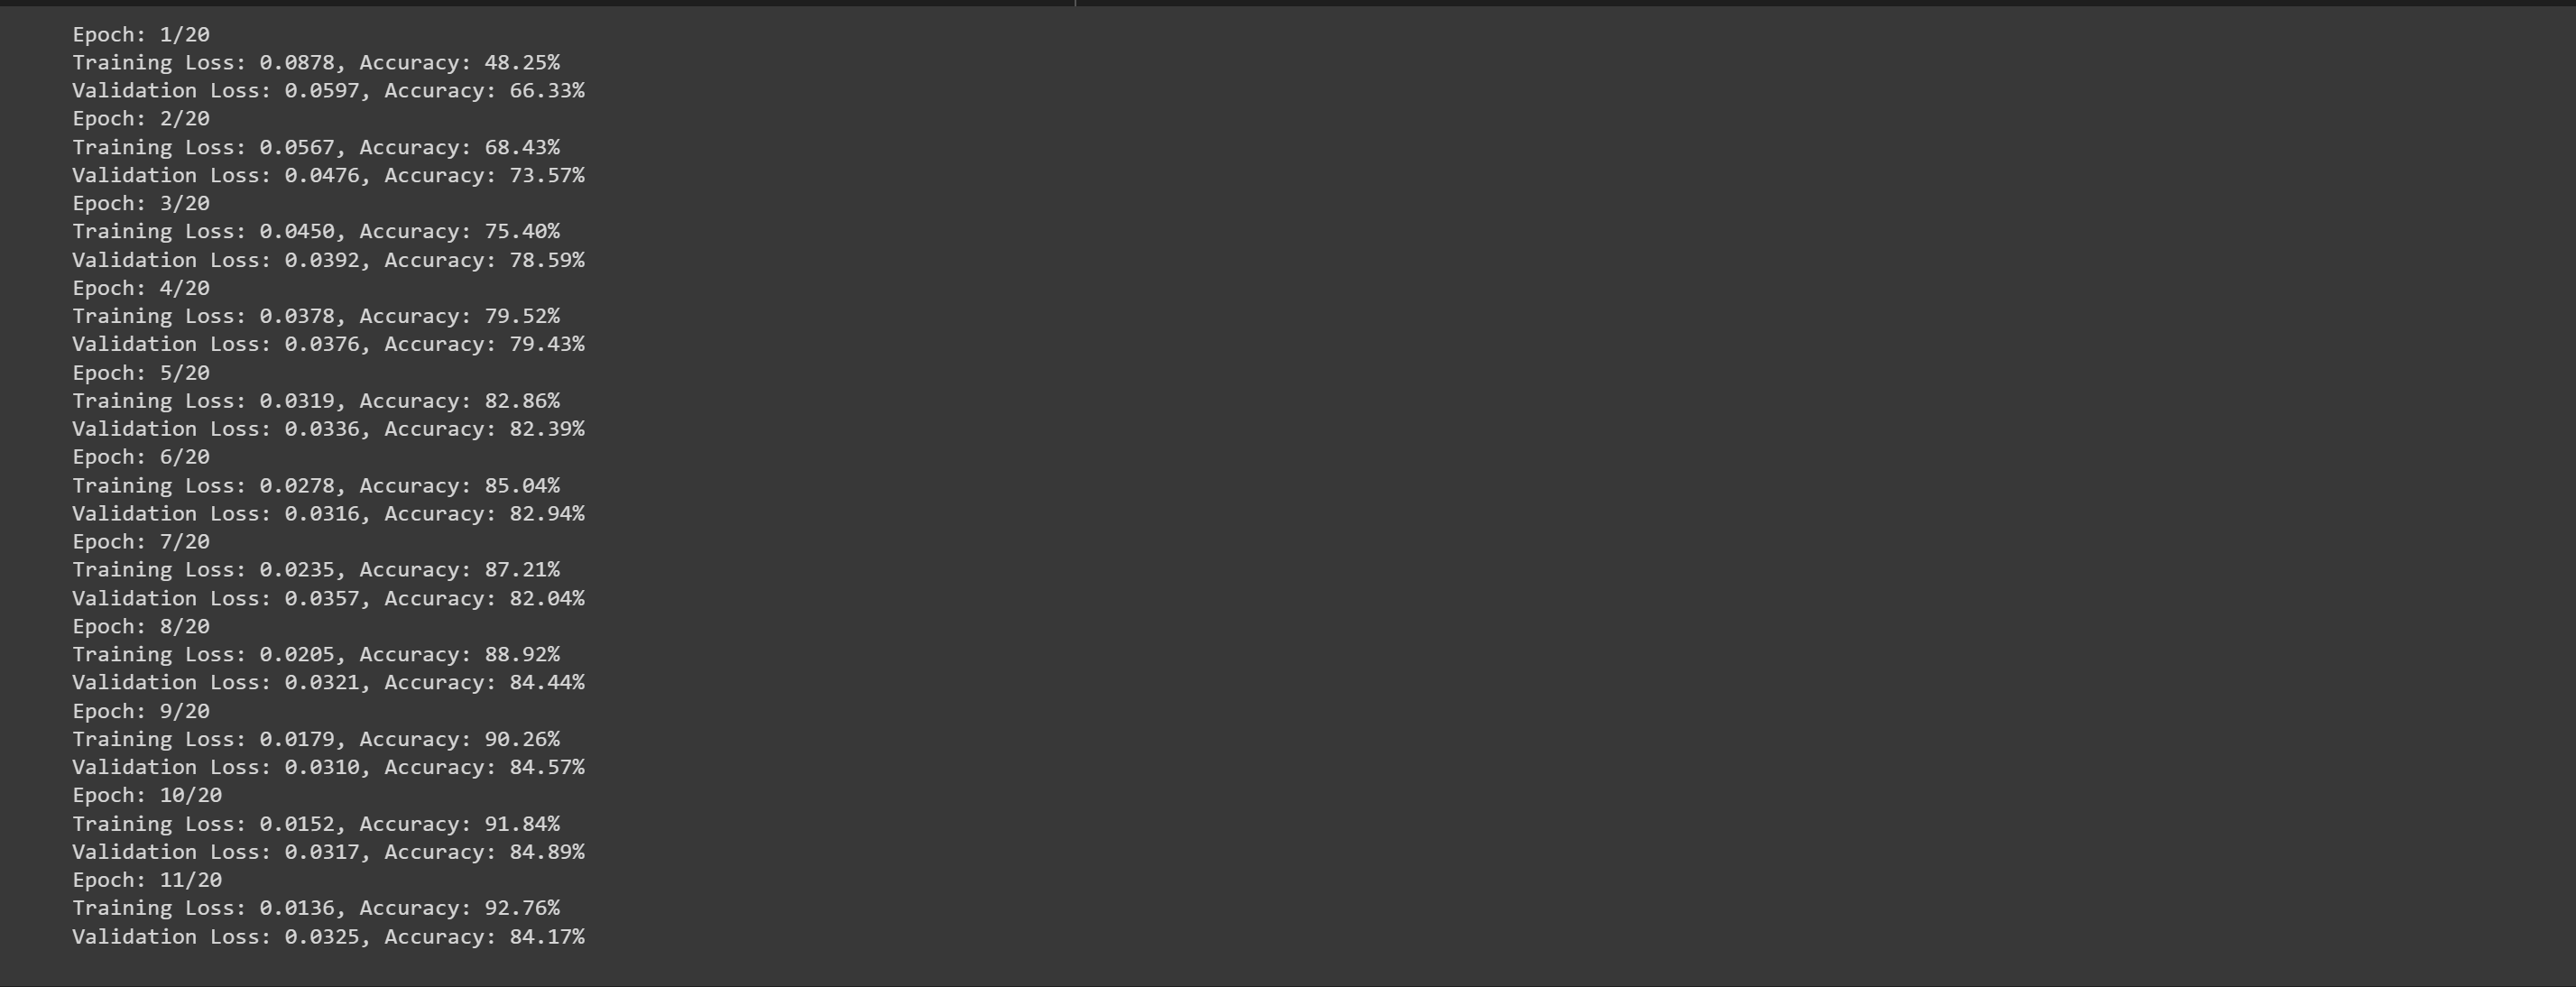


## Decreasing Batch Size (8)

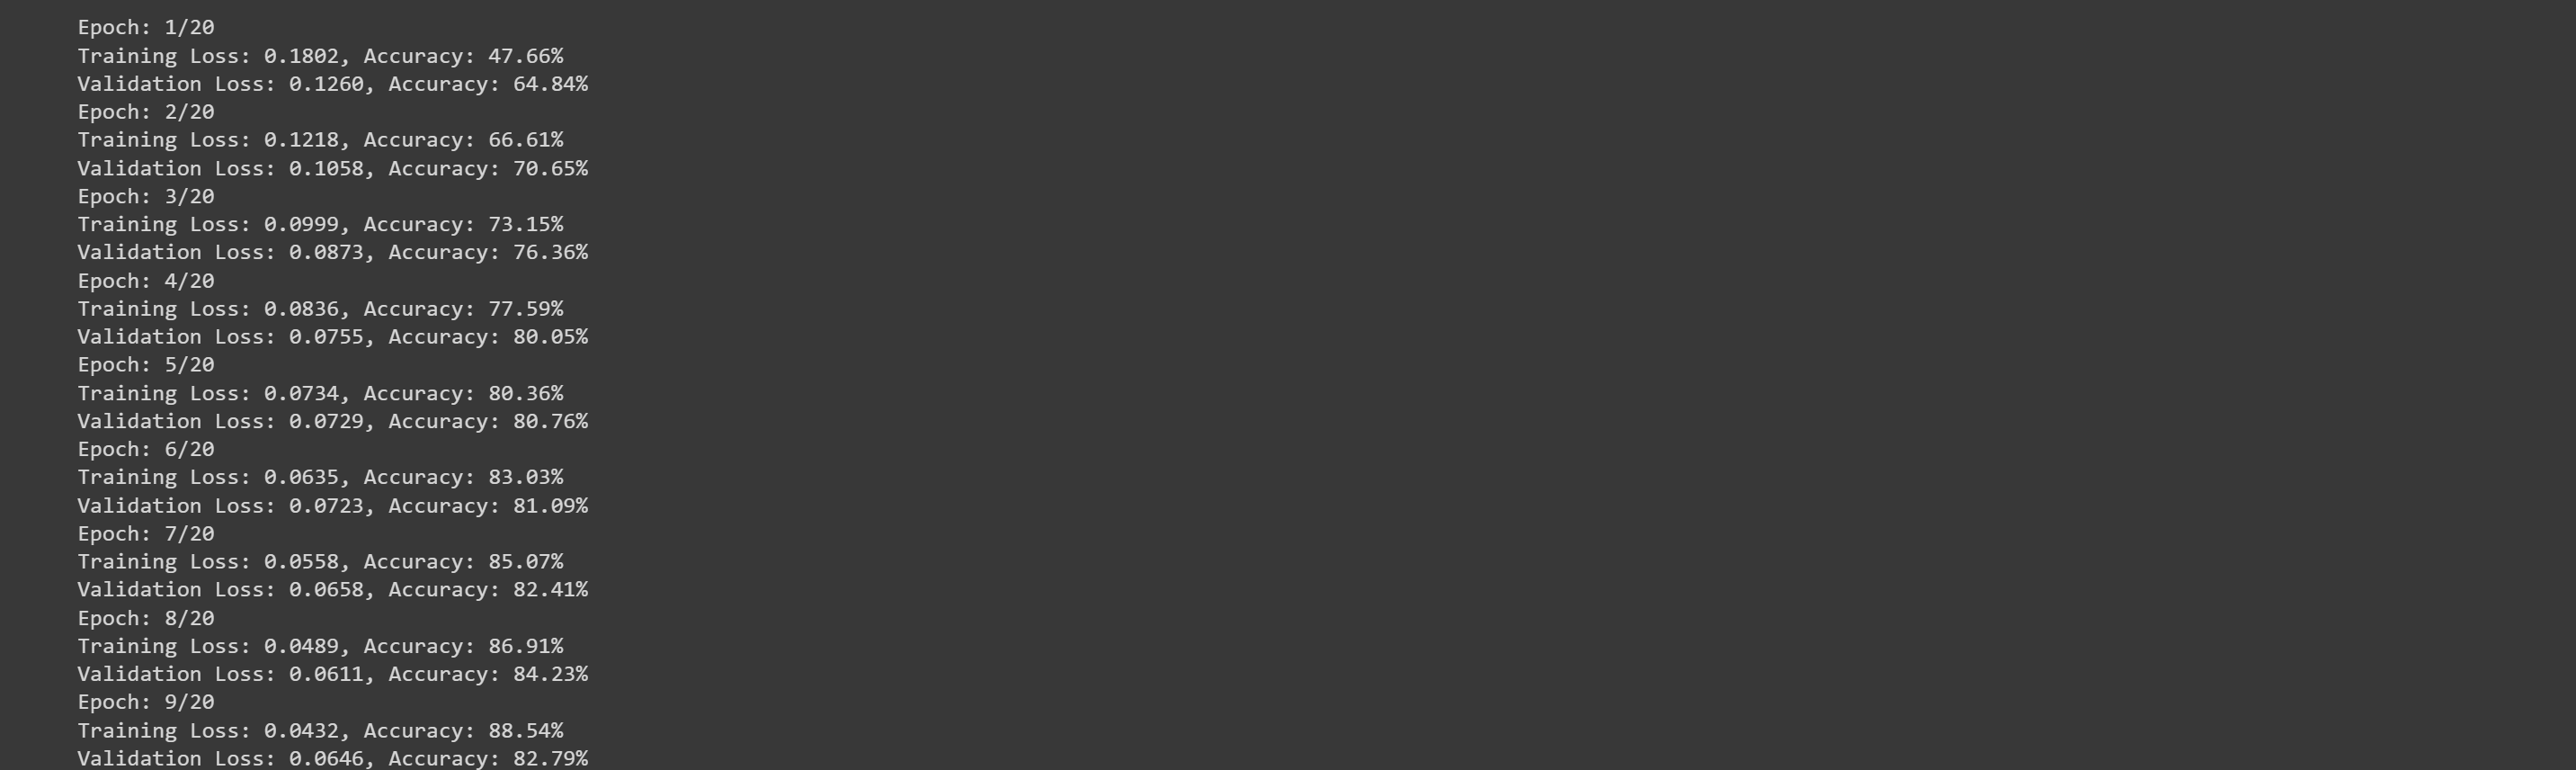